In [246]:
import os

In [247]:
os.getcwd()

'C:\\Users\\HP\\Desktop\\SCIT\\Learn Learn Learn\\Learn Python\\Women_In_Loop_Hackathon'

In [248]:
import pandas as pd 
import matplotlib.pyplot as plt

In [455]:
train=pd.read_csv("train.csv")

In [456]:
train.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


# Data Analysis

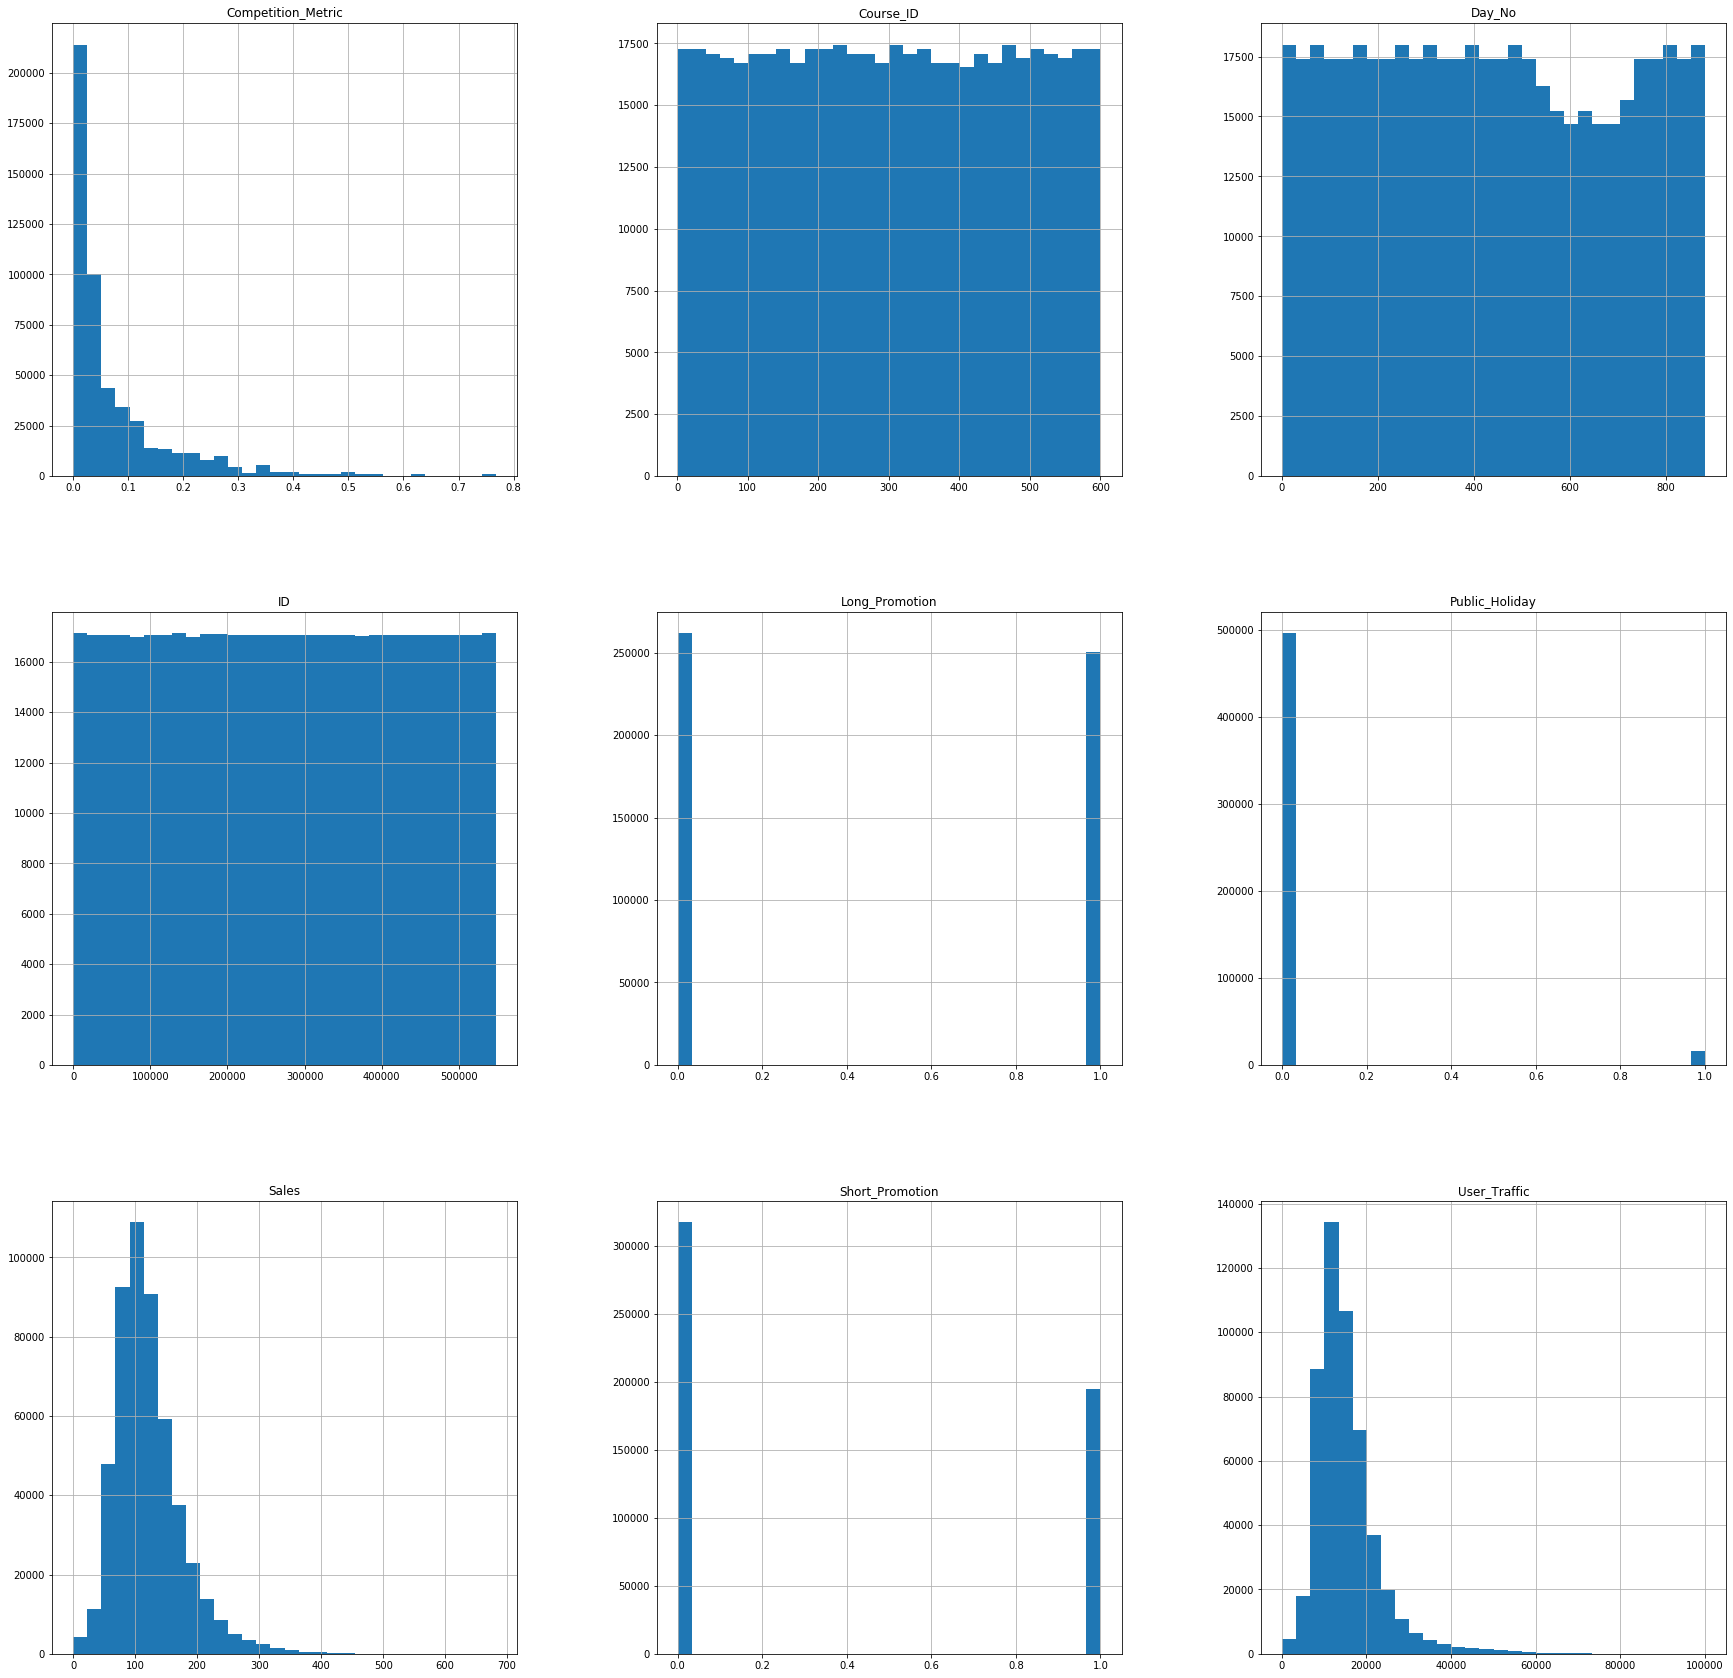

In [457]:
train.hist(figsize=(30,30),bins=30)
plt.show()

Analysis: There is no specific distribution pattern found.Data is mostly skewed.

In [253]:
import seaborn as sns

(9.0, 0.0)

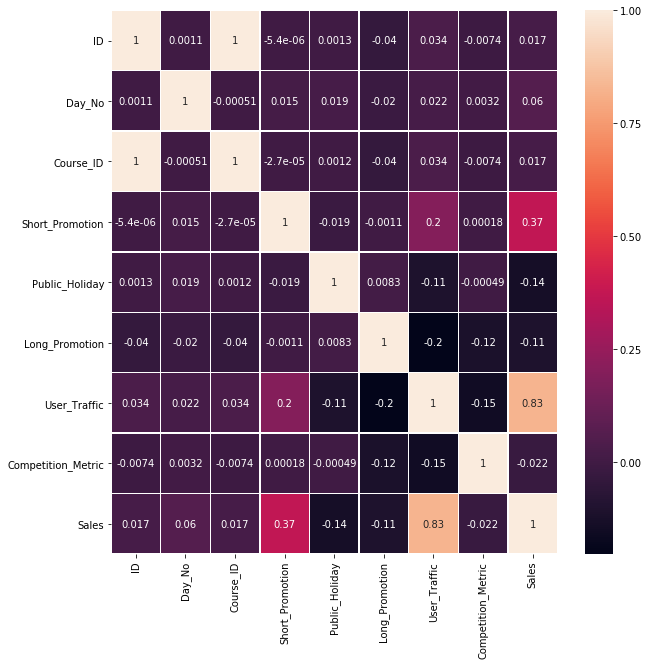

In [254]:
import sys
fig, ax = plt.subplots(figsize=(10,10))
ht=sns.heatmap(train.corr(),annot=True,linewidths=0.5,ax=ax)
bottom,top=ht.get_ylim()
ht.set_ylim(bottom+0.5,top-0.5)


Analysis : User_Traffic has high correlation with Sales 

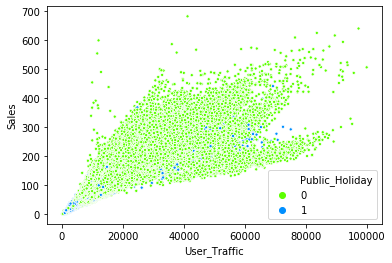

In [255]:
sns.scatterplot(x="User_Traffic",y="Sales",data=train,hue="Public_Holiday",sizes=(100,100),palette="gist_rainbow",s=10)

Analysis: More User Traffic on non-Public Holidays -> Higher Sales

# Data PreProcessing

In [458]:
#Created copy of original data for Data Preprocessing
train1=train.copy()

In [459]:
train1.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [460]:
#Checking for Missing Data
train1.isna().sum()

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

In [461]:
train1.Competition_Metric

0         0.007
1         0.007
2         0.007
3         0.007
4         0.007
          ...  
512082    0.070
512083    0.070
512084    0.070
512085    0.070
512086    0.070
Name: Competition_Metric, Length: 512087, dtype: float64

In [462]:
train1.Competition_Metric.isna().sum()

1764

In [463]:
missing_metric=train1[train1.isnull().any(axis=1)]

In [464]:
missing_metric

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
149014,159515,1,176,Software Marketing,Course,0,1,0,12180,NaN,120
149015,159516,2,176,Software Marketing,Course,0,0,0,18396,NaN,138
149016,159517,3,176,Software Marketing,Course,0,0,0,18291,NaN,132
149017,159518,4,176,Software Marketing,Course,0,0,0,19320,NaN,139
149018,159519,5,176,Software Marketing,Course,0,0,0,11592,NaN,95
...,...,...,...,...,...,...,...,...,...,...,...
302839,324020,878,354,Development,Program,0,0,0,8400,NaN,73
302840,324021,879,354,Development,Program,0,0,0,10332,NaN,97
302841,324022,880,354,Development,Program,0,0,0,6468,NaN,57
302842,324023,881,354,Development,Program,0,0,0,6804,NaN,57


In [465]:
from sklearn.preprocessing import Imputer

In [466]:
#Using Imputer with MEdian Value
imputer=Imputer(strategy="median")

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [467]:
#For Imputer ,there shouldnt be any categorical data. Such should be dropped
numerical_train1=train1.drop(['Course_Domain','Course_Type'],axis=1)

In [468]:
#Imputing Median to all the missing values in the data frame
imputer.fit(numerical_train1)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [469]:
x=imputer.transform(numerical_train1)

In [470]:
transformed_train1=pd.DataFrame(x,columns=numerical_train1.columns,index=list(train1.index.values))

In [471]:
transformed_train1.head()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1.0,1.0,1.0,0.0,1.0,1.0,11004.0,0.007,81.0
1,2.0,2.0,1.0,0.0,0.0,1.0,13650.0,0.007,79.0
2,3.0,3.0,1.0,0.0,0.0,1.0,11655.0,0.007,75.0
3,4.0,4.0,1.0,0.0,0.0,1.0,12054.0,0.007,80.0
4,5.0,5.0,1.0,0.0,0.0,1.0,6804.0,0.007,41.0


In [472]:
transformed_train1['Course_Domain']=train1['Course_Domain']

In [473]:
transformed_train1['Course_Type']=train1['Course_Type']


In [474]:
import seaborn as sns

In [475]:
transformed_train1.head()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Course_Domain,Course_Type
0,1.0,1.0,1.0,0.0,1.0,1.0,11004.0,0.007,81.0,Development,Course
1,2.0,2.0,1.0,0.0,0.0,1.0,13650.0,0.007,79.0,Development,Course
2,3.0,3.0,1.0,0.0,0.0,1.0,11655.0,0.007,75.0,Development,Course
3,4.0,4.0,1.0,0.0,0.0,1.0,12054.0,0.007,80.0,Development,Course
4,5.0,5.0,1.0,0.0,0.0,1.0,6804.0,0.007,41.0,Development,Course


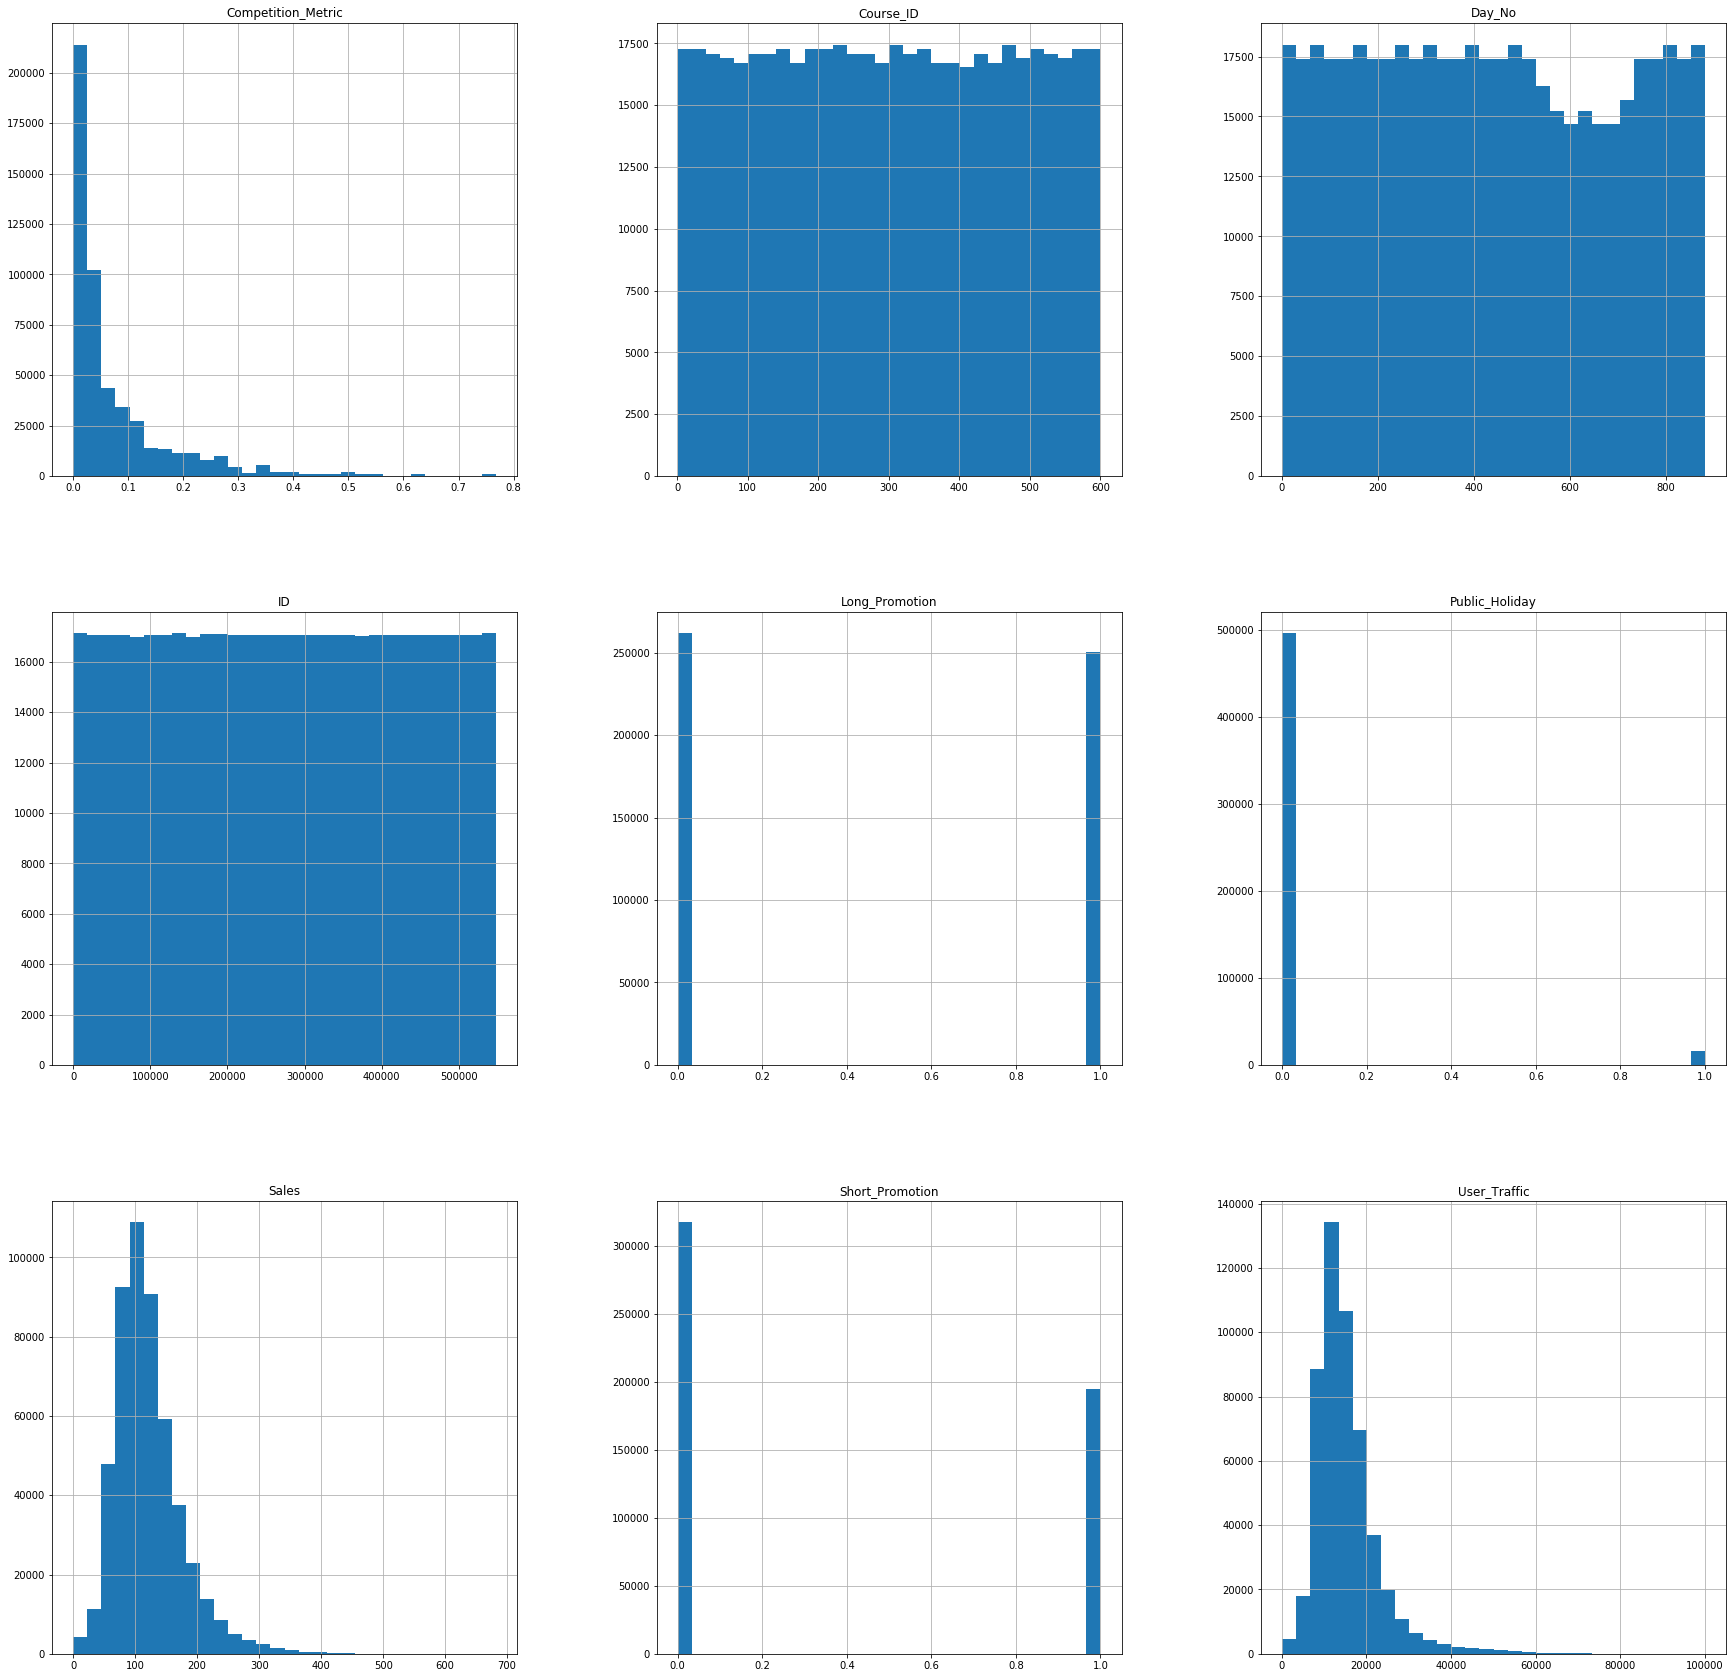

In [275]:
transformed_train1.hist(figsize=(30,30),bins=30)
plt.show()

In [476]:
y=transformed_train1['Sales']
len(transformed_train1)

512087

In [477]:
transformed_train1.head()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Course_Domain,Course_Type
0,1.0,1.0,1.0,0.0,1.0,1.0,11004.0,0.007,81.0,Development,Course
1,2.0,2.0,1.0,0.0,0.0,1.0,13650.0,0.007,79.0,Development,Course
2,3.0,3.0,1.0,0.0,0.0,1.0,11655.0,0.007,75.0,Development,Course
3,4.0,4.0,1.0,0.0,0.0,1.0,12054.0,0.007,80.0,Development,Course
4,5.0,5.0,1.0,0.0,0.0,1.0,6804.0,0.007,41.0,Development,Course


In [478]:
transformed_train1.Course_Domain.unique()

array(['Development', 'Software Marketing', 'Finance & Accounting',
       'Business'], dtype=object)

In [479]:
transformed_train1.Course_Type.unique()

array(['Course', 'Program', 'Degree'], dtype=object)

In [480]:
#Using LabelEncoder to convert categorical to numerical value
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()


In [481]:
transformed_train1['Course_Domain']=number.fit_transform(transformed_train1['Course_Domain'])

In [482]:
transformed_train1['Course_Type']=number.fit_transform(transformed_train1['Course_Type'])

In [483]:
print(transformed_train1['Course_Domain'])

0         1
1         1
2         1
3         1
4         1
         ..
512082    3
512083    3
512084    3
512085    3
512086    3
Name: Course_Domain, Length: 512087, dtype: int32


In [484]:
transformed_train1.drop('ID',axis=1,inplace=True)

In [485]:
X=pd.DataFrame(transformed_train1)
X.columns
len(X)

512087

# Train Test Split

In [486]:
from sklearn.model_selection import train_test_split
#Splitting the data in 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

In [487]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=60)

In [488]:
std=StandardScaler()
X_train_scaled=pd.DataFrame(std.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_val_scaled=pd.DataFrame(std.transform(X_val),columns=X_val.columns,index=X_val.index)
X_test_scaled=pd.DataFrame(std.transform(X_test),columns=X_test.columns,index=X_test.index)

In [489]:
X_train_scaled1=X_train_scaled.copy()
X_val_scaled1=X_val_scaled.copy()
X_test_scaled1=X_test_scaled.copy()

# ML

# Linear Regression

In [490]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [491]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error
RMSE1=cross_val_score(lr,X_train_scaled,y_train,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')

In [492]:
lr.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [493]:
import math

#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(h,y):
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())
    

In [496]:
from sklearn.metrics import r2_score
y_train_pred=lr.predict(X_train_scaled)
y_val_pred=lr.predict(X_val_scaled)
y_pred_lr=np.append(y_train_pred,y_val_pred)
rmsle_train=rmsle(y_train,y_train_pred)
rmsle_test=rmsle(y_val,y_val_pred)
#computing RMSLE values 
print('Train RMSLE:',(rmsle_train*(1000)))
print('Test RMSLE:',(rmsle_test*(1000)))


Train RMSLE: 1.4185486960572558e-12
Test RMSLE: 1.5069037126694172e-12


In [497]:
y_train_pred

array([ 72.,  84.,  26., ..., 100.,  76., 113.])

# Ridge Regression

In [498]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [499]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [500]:
rr100 = Ridge(alpha=100) #  comparison with  higher alpha value
rr100.fit(X_train, y_train)


Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [501]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [502]:
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [503]:
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)


ridge regression train score low alpha: 1.0
ridge regression test score low alpha: 1.0
ridge regression train score high alpha: 0.9999999999999506
ridge regression test score high alpha: 0.9999999999999512


In [505]:
y_train_pred_rr=rr100.predict(X_train_scaled)
y_val_pred_rr=rr100.predict(X_val_scaled)
y_pred_rr=np.append(y_train_pred_rr,y_val_pred_rr)
#Computing RMSLE values
print('Train RMSLE:',(rmsle(y_train,y_train_pred_rr))*1000)
print('Test RMSLE:',(rmsle(y_val,y_val_pred_rr))*1000)

Train RMSLE: 5078.6448839755
Test RMSLE: 5081.939007596491


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


In [506]:
y_train_pred_rr2=rr.predict(X_train_scaled)
y_val_pred_rr2=rr.predict(X_val_scaled)
y_pred_rr2=np.append(y_train_pred_rr2,y_val_pred_rr2)
#Computing RMSLE Values
print('Train RMSLE:',(rmsle(y_train,y_train_pred_rr2))*1000)
print('Test RMSLE:',(rmsle(y_val,y_val_pred_rr2))*1000)

Train RMSLE: 5078.611876883296
Test RMSLE: 5081.903312118303


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


In [507]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)

# Lasso Regression

In [508]:
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score )
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.9999996271616318
test score:  0.9999996299571023
number of features used:  2


In [509]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)


training score for alpha=0.01: 0.9999999833679919
test score for alpha =0.01:  0.9999999835866582
number of features used: for alpha =0.01: 4


In [510]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001 )
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.9999999999400118
test score for alpha =0.0001:  0.9999999999408843
number of features used: for alpha =0.0001: 5


In [511]:
y_train_pred_lasso=lasso00001.predict(X_train_scaled)
y_val_pred_lasso=lasso00001.predict(X_val_scaled)

In [512]:
y_pred_lasso=np.append(y_train_pred_lasso,y_val_pred_lasso)
print('Train RMSLE:',(rmsle(y_train,y_train_pred_lasso))*1000)
print('Test RMSLE:',(rmsle(y_val,y_val_pred_lasso))*1000)

Train RMSLE: 5079.787881356368
Test RMSLE: 5083.107216505451


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


# L1 and L2 regression not recommended based on RMSLE values

# KNN Model

In [513]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors=5)

In [514]:
KNN_model.fit(X_train_scaled1,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [515]:
y_train_knn=KNN_model.predict(X_train_scaled1)

In [516]:
y_val_knn=KNN_model.predict(X_val_scaled1)
y_pred_knn=np.append(y_train_knn,y_val_knn)

In [517]:
#Computing RMSLE values
print('Train RMSLE:',(1000*rmsle(y_train,y_train_knn)))
print('Test RMSLE:',(1000*rmsle(y_val,y_val_knn)))

Train RMSLE: 83.168065289719
Test RMSLE: 100.4111037158397


# XGBoost 

In [518]:
import xgboost
from xgboost import XGBRegressor
xgb=XGBRegressor(random_state=50)
xgb.fit(X_train_scaled1,y_train)
y_train_pred2=xgb.predict(X_train_scaled1)
y_val_pred2=xgb.predict(X_val_scaled1)
print(y_train_pred2)


[ 72.01889   84.01207   26.139996 ...  99.99977   76.000015 113.00118 ]


In [519]:
#computing RMSLE values
print('Train RMSLE:',(1000*rmsle(y_train,y_train_pred2)))
print('Test RMSLE:',(1000*rmsle(y_val,y_val_pred2)))

Train RMSLE: 0.6129987100939115
Test RMSLE: 0.629297469317434


# Learning Curve for XGBoost

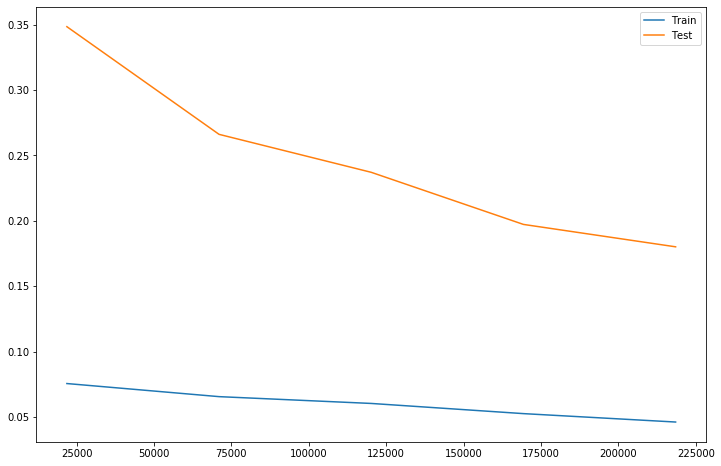

In [317]:
from sklearn.model_selection import learning_curve
lc=learning_curve(xgb,X_train_scaled1,y_train,cv=3,n_jobs=-1,scoring='neg_mean_squared_error')
size=lc[0]
train_score=[-lc[1][i].mean() for i in range (0,5)]
test_score=[-lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,np.sqrt(train_score),label='Train')
plt.plot(size,np.sqrt(test_score),label="Test")
plt.legend()

# Learning Curve for KNN

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


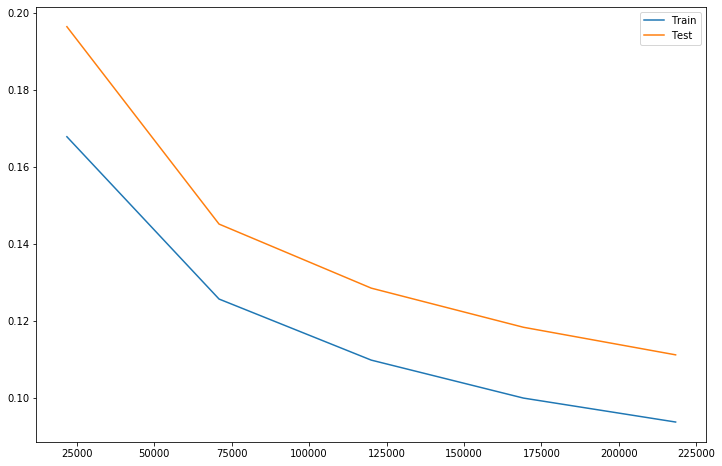

In [319]:
from sklearn.model_selection import learning_curve
lc=learning_curve(KNN_model,X_train_scaled1,y_train,cv=3,n_jobs=-1,scoring='neg_mean_squared_log_error')
size=lc[0]
train_score=[-lc[1][i].mean() for i in range (0,5)]
test_score=[-lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,np.sqrt(train_score),label='Train')
plt.plot(size,np.sqrt(test_score),label="Test")
plt.legend()

# Learning Curve to Linear Regression

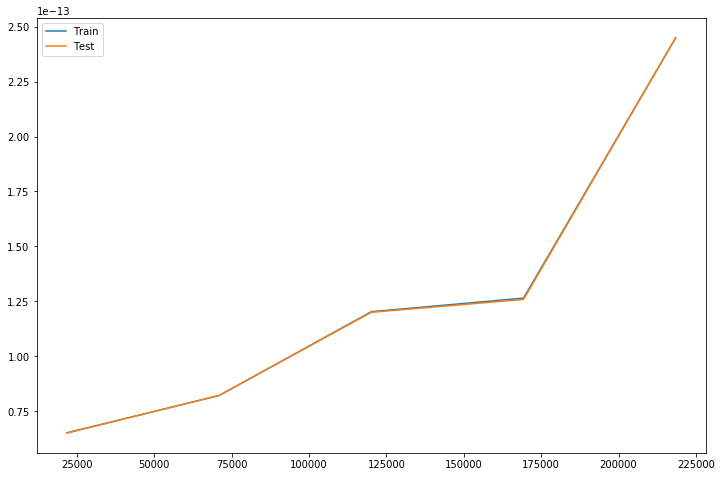

In [385]:
lc=learning_curve(lr,X_train_scaled1,y_train,cv=3,n_jobs=-1,scoring='neg_mean_squared_error')
size=lc[0]
train_score=[-lc[1][i].mean() for i in range (0,5)]
test_score=[-lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,np.sqrt(train_score),label='Train')
plt.plot(size,np.sqrt(test_score),label="Test")
plt.legend()

#out of KNN, XGB and Linear Regression Model. LR model best fits the data. We will use this for our prediction

# Results on Test Data

In [520]:
#Loading the Test Data
test=pd.read_csv("test_QkPvNLx.csv")

In [521]:
test.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


In [522]:
#transforming categorical data to numerical
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
test['Course_Domain']=number.fit_transform(test['Course_Domain'])
test['Course_Type']=number.fit_transform(test['Course_Type'])

In [523]:
test.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,1,0,1,0,1,0.007
1,884,884,1,1,0,1,0,1,0.007
2,885,885,1,1,0,1,0,1,0.007
3,886,886,1,1,0,1,0,1,0.007
4,887,887,1,1,0,0,0,1,0.007


In [524]:
test_ids=test['ID']
test.drop(['ID'],axis=1,inplace=True)


In [369]:
print(X.columns)
print(test.columns)

Index(['Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'User_Traffic', 'Competition_Metric', 'Course_Domain',
       'Course_Type'],
      dtype='object')
Index(['Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion',
       'Competition_Metric'],
      dtype='object')


In [525]:
X.drop(['Sales'],axis=1,inplace=True)

In [526]:
X.columns

Index(['Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'User_Traffic', 'Competition_Metric', 'Course_Domain',
       'Course_Type'],
      dtype='object')

In [370]:
X.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)




In [527]:
#Using Dummy values to balance the number of parameters in train and test data
train_objs_num = len(X)
dataset=pd.DataFrame()
dataset = pd.concat(objs=[X, test], axis=0).sort_index()
len(dataset)

dataset_preprocessed = pd.get_dummies(dataset)
len(dataset_preprocessed)
train_preprocessed = dataset_preprocessed.iloc[:train_objs_num]
test_preprocessed = dataset_preprocessed.iloc[train_objs_num:]

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [528]:
print(train_preprocessed.columns)
print(test_preprocessed.columns)

Index(['Competition_Metric', 'Course_Domain', 'Course_ID', 'Course_Type',
       'Day_No', 'Long_Promotion', 'Public_Holiday', 'Short_Promotion',
       'User_Traffic'],
      dtype='object')
Index(['Competition_Metric', 'Course_Domain', 'Course_ID', 'Course_Type',
       'Day_No', 'Long_Promotion', 'Public_Holiday', 'Short_Promotion',
       'User_Traffic'],
      dtype='object')


In [529]:
#New NaN values generated in training set
train_preprocessed.isna().sum()

Competition_Metric      120
Course_Domain             0
Course_ID                 0
Course_Type               0
Day_No                    0
Long_Promotion            0
Public_Holiday            0
Short_Promotion           0
User_Traffic          36000
dtype: int64

In [530]:
len(test_preprocessed)

36000

In [531]:
dataset_preprocessed.head()

,Competition_Metric,Course_Domain,Course_ID,Course_Type,Day_No,Long_Promotion,Public_Holiday,Short_Promotion,User_Traffic
0,0.007,1,1.0,0,1.0,1.0,1.0,0.0,11004.0
0,0.007,1,1.0,0,883.0,1.0,0.0,1.0,NaN
1,0.007,1,1.0,0,884.0,1.0,0.0,1.0,NaN
1,0.007,1,1.0,0,2.0,1.0,0.0,0.0,13650.0
2,0.007,1,1.0,0,3.0,1.0,0.0,0.0,11655.0


In [532]:
test_preprocessed.isna().sum()

Competition_Metric    0
Course_Domain         0
Course_ID             0
Course_Type           0
Day_No                0
Long_Promotion        0
Public_Holiday        0
Short_Promotion       0
User_Traffic          0
dtype: int64

In [425]:
test_preprocessed['User_Traffic'].fillna(0,inplace=True)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [533]:
X_scaled.isna().sum()
X_scaled=pd.DataFrame(std.fit_transform(train_preprocessed),columns=train_preprocessed.columns,index=train_preprocessed.index)

In [434]:
X_scaled.drop(['Sales'],axis=1,inplace=True)


In [534]:
#Median Imputation to fill Na values
med_value=X_scaled["User_Traffic"].median()


In [535]:
X_scaled["User_Traffic"]=X_scaled["User_Traffic"].fillna(med_value)

In [536]:
X_scaled.isna().sum()

Competition_Metric    120
Course_Domain           0
Course_ID               0
Course_Type             0
Day_No                  0
Long_Promotion          0
Public_Holiday          0
Short_Promotion         0
User_Traffic            0
dtype: int64

In [541]:
med_val_Comp=X_scaled["Competition_Metric"].median()
X_scaled["Competition_Metric"]=X_scaled["Competition_Metric"].fillna(med_val_Comp)

In [542]:
test_scaled=pd.DataFrame(std.transform(test_preprocessed),columns=test_preprocessed.columns)
test_scaled.head()

,Competition_Metric,Course_Domain,Course_ID,Course_Type,Day_No,Long_Promotion,Public_Holiday,Short_Promotion,User_Traffic
0,-0.710983,-0.867278,1.716006,1.035658,-1.245897,-0.971795,-0.176455,-0.785586,0.483381
1,-0.710983,-0.867278,1.716006,1.035658,-1.242268,-0.971795,-0.176455,-0.785586,0.491540
2,-0.710983,-0.867278,1.716006,1.035658,-1.238639,-0.971795,-0.176455,-0.785586,0.268534
3,-0.710983,-0.867278,1.716006,1.035658,-1.235009,-0.971795,-0.176455,-0.785586,0.719984
4,-0.710983,-0.867278,1.716006,1.035658,-1.231380,-0.971795,5.667180,-0.785586,0.306608


In [539]:
print(X_scaled.isna().sum())

Competition_Metric    0
Course_Domain         0
Course_ID             0
Course_Type           0
Day_No                0
Long_Promotion        0
Public_Holiday        0
Short_Promotion       0
User_Traffic          0
dtype: int64


# Prediction on Test Data using Linear Regression Model

In [450]:

lr=LinearRegression()

std=StandardScaler()
lr.fit(X_scaled,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [451]:
y_pred_lr=lr.predict(test_scaled)

In [452]:
submission=pd.DataFrame(index=test_ids)
submission["Sales"]=list(map(float,y_pred_lr))

In [453]:
submission.to_csv("Submission.csv")

# Prediction using KNN Model

In [543]:
KNN_model.fit(X_scaled,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [544]:
y_pred_knn=KNN_model.predict(test_scaled)


In [545]:
#Storing values in another Dataframe
submission2=pd.DataFrame(index=test_ids)
submission2["Sales"]=list(map(float,y_pred_knn))

#Saving into csv
submission2.to_csv("Submission2.csv")